# **PROJET PRODUCT SUBSCRIPTION**
-------------
### Auteurs: Julien Sadoun, Cyril Lemaire, Dan Cohen



In [1]:
# ========== Packages ==========

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yaml
import phik

sns.set(rc={'figure.figsize':(15,10)})

In [2]:
# ========== Chemin des datas ==========

path_data = '../../data/'

In [3]:
# ========== Importation des Datas ==========

market_campaign = pd.read_csv(path_data + 'data.csv', delimiter = ';')
socio_eco = pd.read_csv(path_data + 'socio_eco.csv', delimiter = ';')

In [4]:
# ========== Jointure des 2 dataframes + split de la date en mois & années ==========

def split_date (dataframe):

    col_split = dataframe.DATE.str.split("-")
    n = len(col_split)
    months, years = [], []

    for i in range(n):
        months.append(col_split[i][1])
        years.append(col_split[i][0])
    
    dataframe["YEARS"] = years
    dataframe["MONTHS"] = months

    return dataframe

socio_eco = split_date(socio_eco)
market_campaign = split_date(market_campaign)

market_campaign_merged = market_campaign.merge(socio_eco, how = 'left', on = ["MONTHS", "YEARS"])
market_campaign_merged.drop(columns = 'DATE_y', inplace = True)

In [5]:
# ========== Imputation de Yes/No en 1/0 ou de nan en Unknown selon la feature ==========

market_campaign_merged.SUBSCRIPTION = market_campaign_merged.SUBSCRIPTION.replace(["Yes","No"],[1,0])
market_campaign_merged.RESULT_LAST_CAMPAIGN = market_campaign_merged.RESULT_LAST_CAMPAIGN.replace(np.nan, "Unknown")
#market_campaign_merged.HAS_DEFAULT = market_campaign_merged.HAS_DEFAULT.replace(["Yes","No"],[1,0])

##### Affichons les informations principales de notre Dataset.

In [6]:
market_campaign_merged.head()

,DATE_x,AGE,JOB_TYPE,STATUS,EDUCATION,HAS_DEFAULT,BALANCE,HAS_HOUSING_LOAN,HAS_PERSO_LOAN,CONTACT,...,NB_CONTACT,NB_DAY_LAST_CONTACT,NB_CONTACT_LAST_CAMPAIGN,RESULT_LAST_CAMPAIGN,SUBSCRIPTION,YEARS,MONTHS,EMPLOYMENT_VARIATION_RATE,IDX_CONSUMER_PRICE,IDX_CONSUMER_CONFIDENCE
0,2008-05-05,58,Manager,Marié,Tertiaire,No,2143,Yes,No,NaN,...,1,-1,0,Unknown,0,2008,05,1.1,93.994,-36.4
1,2008-05-05,123,Technicien,NaN,Secondaire,No,29,Yes,NaN,NaN,...,1,-1,0,Unknown,0,2008,05,1.1,93.994,-36.4
2,2008-05-05,33,Entrepreuneur,Marié,Secondaire,No,2,Yes,Yes,NaN,...,1,-1,0,Unknown,0,2008,05,1.1,93.994,-36.4
3,2008-05-05,47,Col bleu,Marié,NaN,No,1506,Yes,No,NaN,...,1,-1,0,Unknown,0,2008,05,1.1,93.994,-36.4
4,2008-05-05,33,NaN,Célibataire,NaN,No,1,No,No,NaN,...,1,-1,0,Unknown,0,2008,05,1.1,93.994,-36.4


In [15]:
# ========== Description rapide du Dataset ==========

market_campaign_merged.describe()

,AGE,BALANCE,DURATION_CONTACT,NB_CONTACT,NB_DAY_LAST_CONTACT,NB_CONTACT_LAST_CAMPAIGN,SUBSCRIPTION,EMPLOYMENT_VARIATION_RATE,IDX_CONSUMER_PRICE,IDX_CONSUMER_CONFIDENCE
count,45136.000000,45136.000000,45136.000000,45136.00000,45136.000000,45136.000000,45136.000000,41084.000000,41084.000000,41084.000000
mean,44.206354,1362.182847,258.050625,2.76573,40.042272,0.575173,0.116382,0.088726,93.576483,-40.445760
std,19.149653,3046.691765,257.527875,3.10002,99.910200,2.296948,0.320686,1.566447,0.576712,4.605533
min,18.000000,-8019.000000,0.000000,1.00000,-1.000000,0.000000,0.000000,-3.400000,92.201000,-50.000000
25%,33.000000,72.000000,103.000000,1.00000,-1.000000,0.000000,0.000000,-1.800000,93.075000,-42.700000
50%,40.000000,447.500000,180.000000,2.00000,-1.000000,0.000000,0.000000,1.100000,93.749000,-41.800000
75%,50.000000,1425.000000,318.000000,3.00000,-1.000000,0.000000,0.000000,1.400000,93.994000,-36.400000
max,123.000000,102127.000000,4918.000000,63.00000,854.000000,275.000000,1.000000,1.400000,94.601000,-26.900000


In [16]:
# ========== Comptage des NaN par feature ==========

market_campaign.isna().sum()

DATE                            0
AGE                             0
JOB_TYPE                      286
STATUS                       1128
EDUCATION                    1853
HAS_DEFAULT                     0
BALANCE                         0
HAS_HOUSING_LOAN                0
HAS_PERSO_LOAN               1354
CONTACT                     13019
DURATION_CONTACT                0
NB_CONTACT                      0
NB_DAY_LAST_CONTACT             0
NB_CONTACT_LAST_CAMPAIGN        0
RESULT_LAST_CAMPAIGN        36939
SUBSCRIPTION                    0
YEARS                           0
MONTHS                          0
dtype: int64

Nous remarquons que le dataset est globalement bien rempli mais que 2 variables sortent du lot. Nous avons décidé de supprimer ces 2 variables car elles nous introduirons du biais dans notre futur modèle.\
Mais la variable "RESULT_LAST_CAMPAIGN" peut être un indicateur intéressant pour aider le métier à avoir un indicateur quant à la sensibilité du client.

interval columns not set, guessing: ['AGE', 'BALANCE', 'DURATION_CONTACT', 'NB_CONTACT', 'NB_DAY_LAST_CONTACT', 'NB_CONTACT_LAST_CAMPAIGN']


/home/dancoh/.local/lib/python3.8/site-packages/phik/data_quality.py:55: UserWarning: The number of unique values of variable DATE is very large: 552. Are you sure this is not an interval variable? Analysis for pairs of variables including DATE might be slow.
  warnings.warn(


<AxesSubplot:>

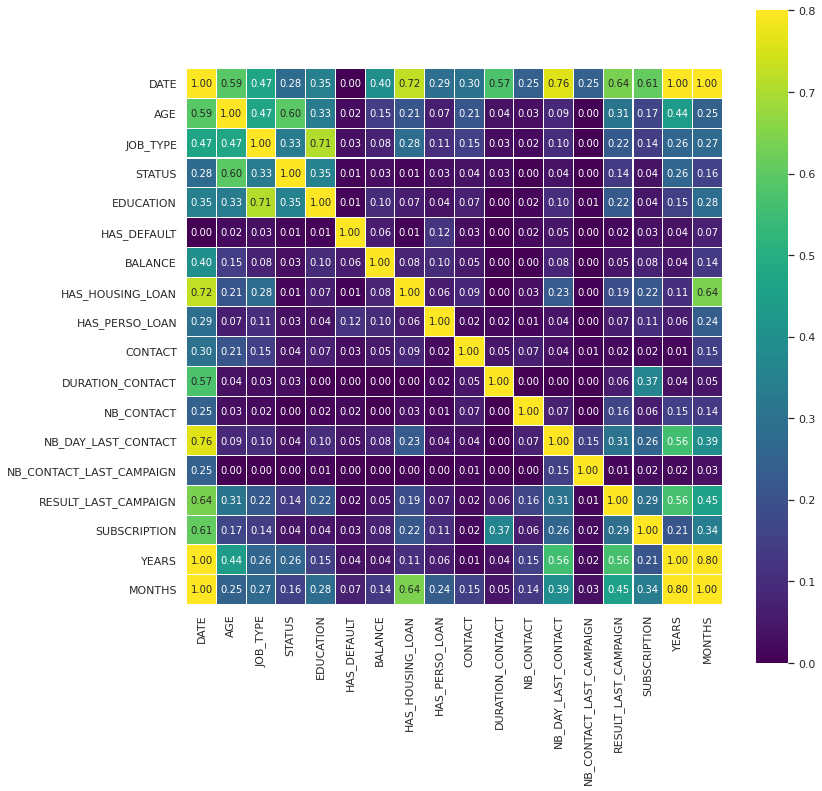

In [17]:
# ========== Plot matrice de corrélation de Phik ==========

colormap = plt.cm.viridis
cor = market_campaign.phik_matrix()
plt.figure(figsize=(12,12))
sns.heatmap(cor,vmax=0.8,cmap=colormap,
            annot=True,fmt='.2f',
            square=True,annot_kws={'size':10},
            linecolor='white',linewidths=0.1)

On observe des corrélations positives entre notre variable cible "SUBSCRIPTION" et plusieurs variables dont la durée de l'appel et le nombre de jours écoulé après que le client ait été contacté lors d'une campagne précédente et le resultat de la campagne précédente.\
On en observe aussi de légères entre notre cible et le fait d'avoir un crédit immobilier ou non, le type de job et l'âge.\
\
Mais on observe aussi de fortes corrélations entre AGE et JOB_TYPE mais aussi avec STATUS ainsi qu'EDUCATION avec JOB_TYPE.


#### Maintenant, traçons l'histogramme de la variable AGE qui semble avoir un maximum à 123.

/home/dancoh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AGE', ylabel='Density'>

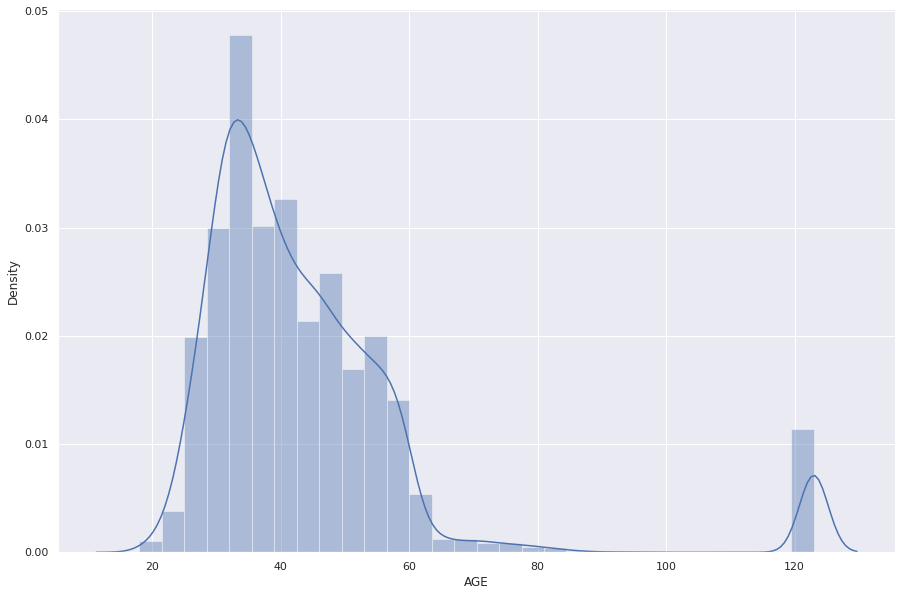

In [13]:
# ========== Histogramme feature AGE ==========

sns.distplot(market_campaign_merged.AGE, bins = 30)

On remarque donc qu'il y a des anomalies à 123.

#### Intéressons au violinplot de la variable AGE en fonction des 2 niveaux de souscriptions.

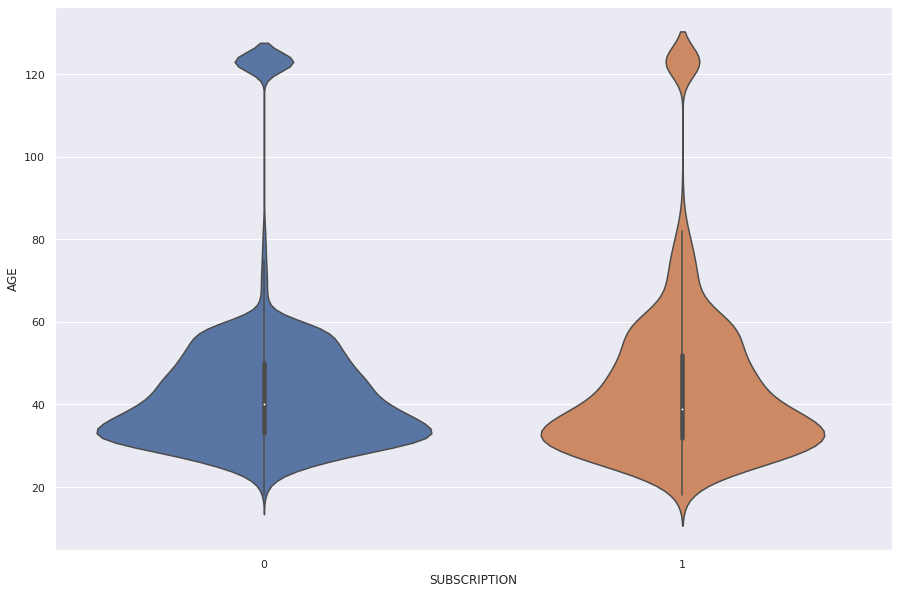

In [93]:
# ========== Violinplot de la variable Age en fonction des niveaux de souscription ==========

sns.violinplot(x="SUBSCRIPTION",y="AGE", data = market_campaign_merged, whis = 2.0);
plt.show()

#### Intéressons nous maintenant à la variable quantitative Balance.


<AxesSubplot:xlabel='BALANCE', ylabel='Count'>

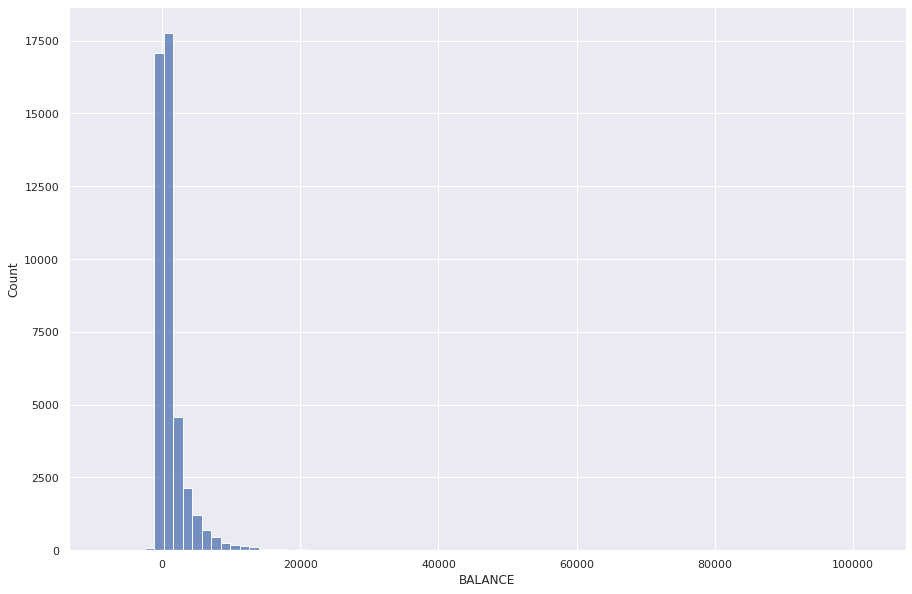

In [19]:
# ========== Histogramme de Balance ==========

sns.histplot(market_campaign_merged.BALANCE, bins = 80)

Nous remarquons que la majorité de notre échantillon est concentrée entre 0 et 10000. Nous avons des balances négatives mais aussi des valeurs extrêmes qui déforment la distribution avec notamment un maximum à 100 000.\
Regardons maintenant les boxplots de cette variable en fonction des différents niveaux de souscription. Étudions les boxplots en subdivisant la variable BALANCE en 3 niveaux.

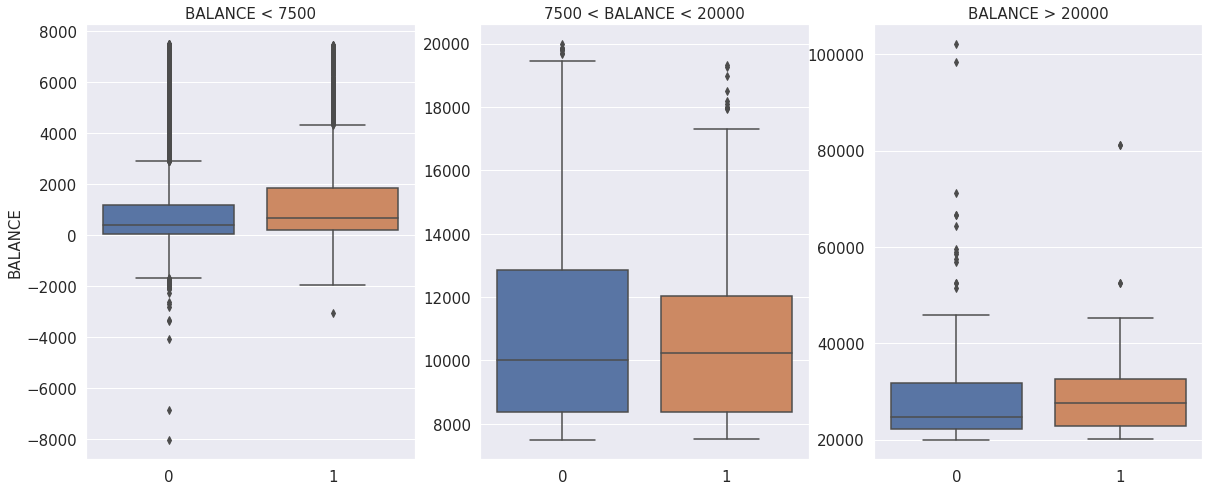

In [73]:
# ========== Boxplots des subdivisions de Balance ==========

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))

sns.boxplot(x = 'SUBSCRIPTION', 
            y = 'BALANCE', 
            data = market_campaign_merged[market_campaign_merged.BALANCE<7500], 
            ax = ax1)

ax1.set_title('BALANCE < 7500', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('BALANCE', fontsize=15)
ax1.tick_params(labelsize=15)


sns.boxplot(x = 'SUBSCRIPTION', 
            y = 'BALANCE', 
            data = market_campaign_merged[market_campaign_merged.BALANCE.between(7500,20000)], 
            ax = ax2)

ax2.set_title('7500 < BALANCE < 20000', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('', fontsize=15)
ax2.tick_params(labelsize=15)

sns.boxplot(x = 'SUBSCRIPTION', 
            y = 'BALANCE', 
            data = market_campaign_merged[market_campaign_merged.BALANCE>20000], 
            ax = ax3)

ax3.set_title('BALANCE > 20000', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('', fontsize=15)
ax3.tick_params(labelsize=15)


On observe que l'on a, en nombre, une meilleure souscription pour les individus ayant une balance entre 0 et 200 et 20000 et 40000 que pour les individus ayant une balance entre 8000 et 14000.

#### Regardons la distribution de la variable JOB_TYPE avec en ordonnée la moyenne de Yes dans chaque sous catégorie.

<AxesSubplot:xlabel='JOB_TYPE', ylabel='SUBSCRIPTION'>

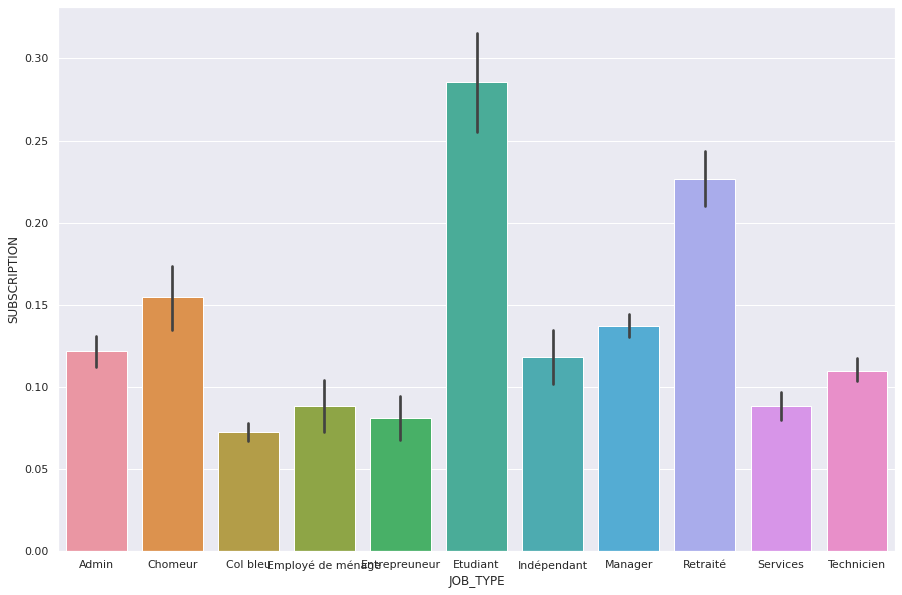

In [96]:
# ========== Histogramme de Souscription en fonction de Job_Type ==========

sns.barplot(x = 'JOB_TYPE',y="SUBSCRIPTION", data = market_campaign_merged, 
              order = ["Admin","Chomeur","Col bleu", "Employé de ménage", "Entrepreuneur","Etudiant","Indépendant",
                      "Manager","Retraité","Services","Technicien"])

Nous remarquons qu'en moyenne, les catégories de job qui souscrivent le plus sont Retraité et Etudiant.

#### Regardons maintenant la variable Has_Default.

<AxesSubplot:xlabel='HAS_DEFAULT', ylabel='SUBSCRIPTION'>

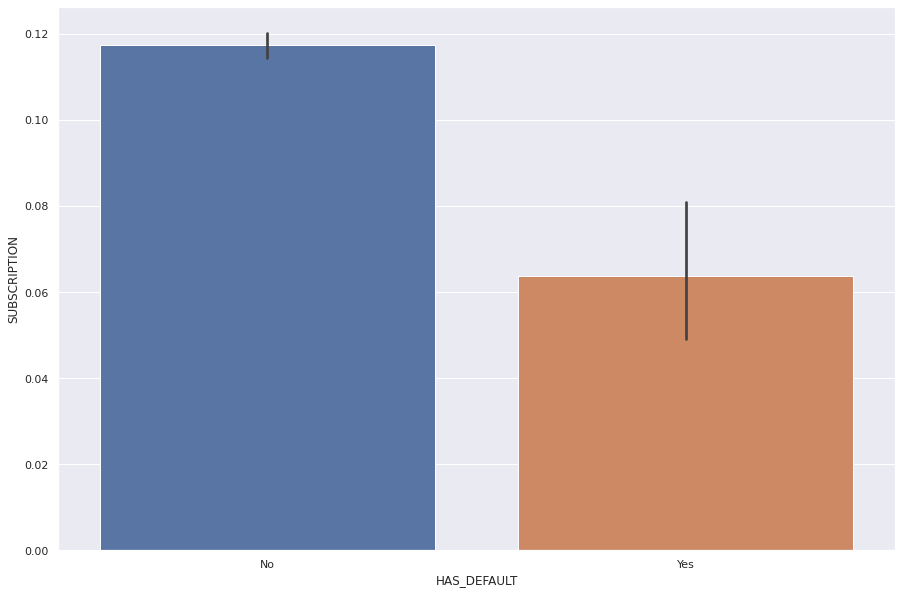

In [75]:
# ========== Histogramme de Has_Default ==========

sns.barplot(x = "HAS_DEFAULT", y = "SUBSCRIPTION", data = market_campaign_merged)

#### Regardons maintenant si nous avons un lien entre les resultats de la campagne précédente et la souscription actuelle.

<AxesSubplot:xlabel='RESULT_LAST_CAMPAIGN', ylabel='SUBSCRIPTION'>

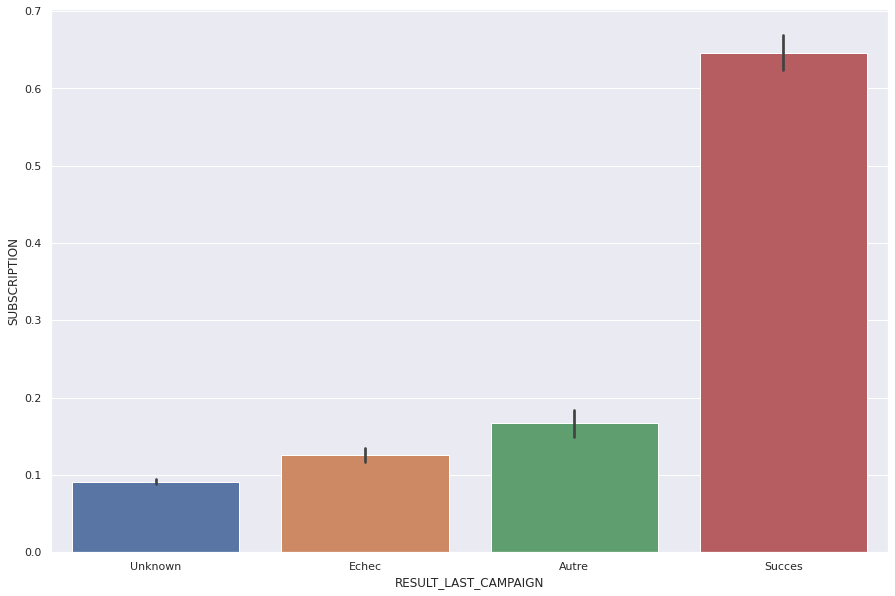

In [99]:
# ========== Histogramme de Souscription en fonction de RESULT_LAST_CAMPAIGN ==========

sns.barplot(x = "RESULT_LAST_CAMPAIGN", y = "SUBSCRIPTION", data = market_campaign_merged)

Nous remarquons sur l'histogramme que la corrélation que nous avons observée est bien vérifiée.

#### Histogramme de la variable MONTHS.

<AxesSubplot:xlabel='MONTHS', ylabel='SUBSCRIPTION'>

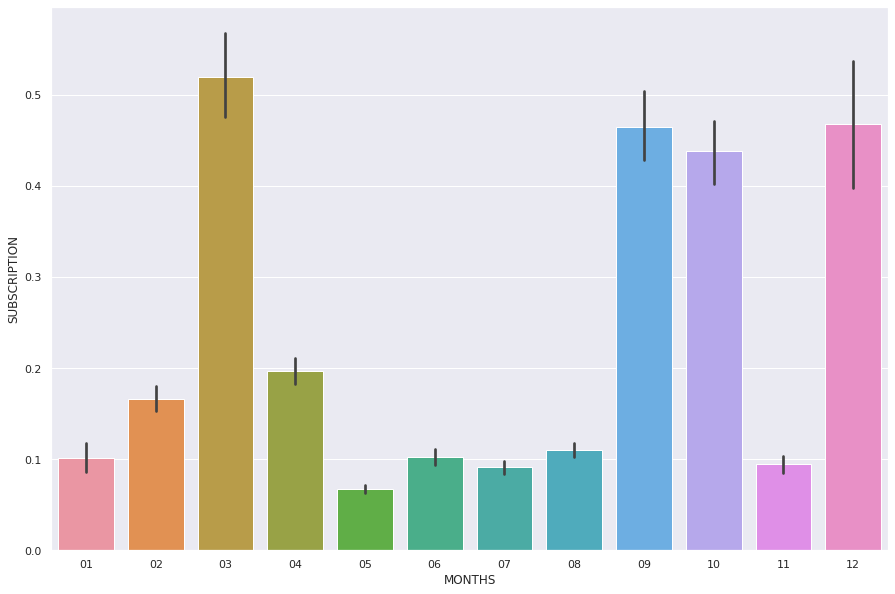

In [100]:
sns.barplot(x = "MONTHS",y = "SUBSCRIPTION", data = market_campaign_merged,
              order = ["01","02","03","04","05","06","07","08","09","10","11","12"])

Nous remarquons une tendance de souscription pour les mois de Mars, Septembre, Octobre et Décembre.\
Concernant les mois de Septembre et d'Octobre, ceux sont les mois de la rentrée et la population reprend son activité économique.\
Au mois de décemble, il s'agit d'une période de fin d'année où beaucoup d'achats sont engagés et où le 13ème tombe sans doute. De l'argent peut être mis à disposition pour investir.\
Entre janvier et février, comme beaucoup de dépenses ont été engagées le mois d'avant, des économies sont faites et au mois de mars, les clients peuvent investir pour le reste de l'année.

#### Regardons les autres variables: Status, Education, Has_housing_loan et Has_perso_loan

<AxesSubplot:xlabel='STATUS', ylabel='SUBSCRIPTION'>

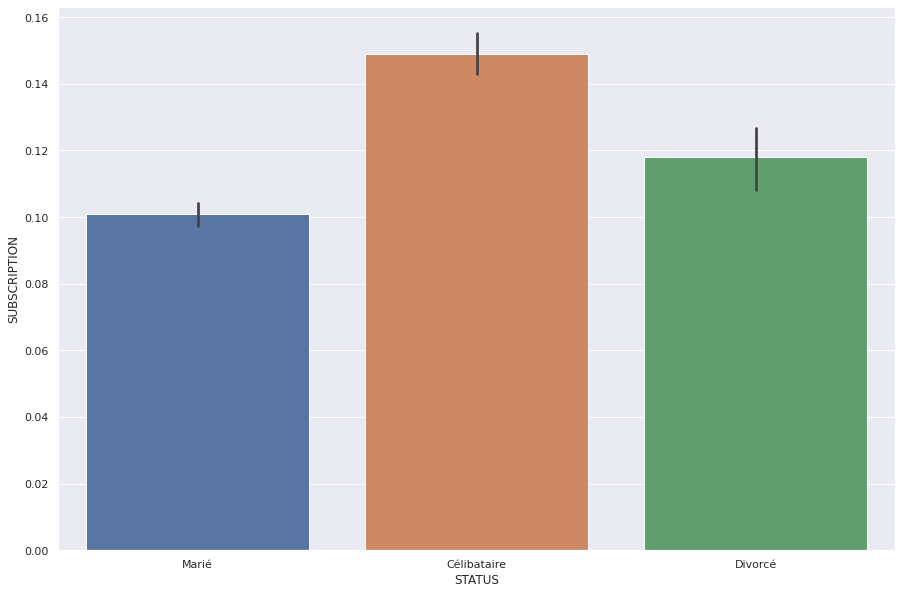

In [101]:
sub_status = market_campaign_merged.dropna(subset = ['STATUS'])

sns.barplot(x = 'STATUS', y = 'SUBSCRIPTION', data = sub_status)

<AxesSubplot:xlabel='EDUCATION', ylabel='SUBSCRIPTION'>

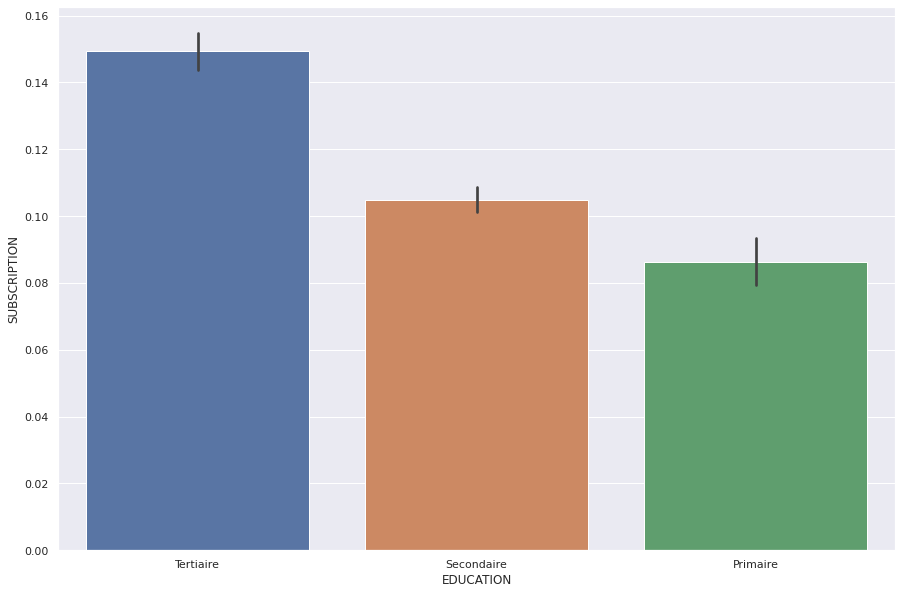

In [102]:
sns.barplot(x = 'EDUCATION', y = 'SUBSCRIPTION', data = market_campaign_merged)

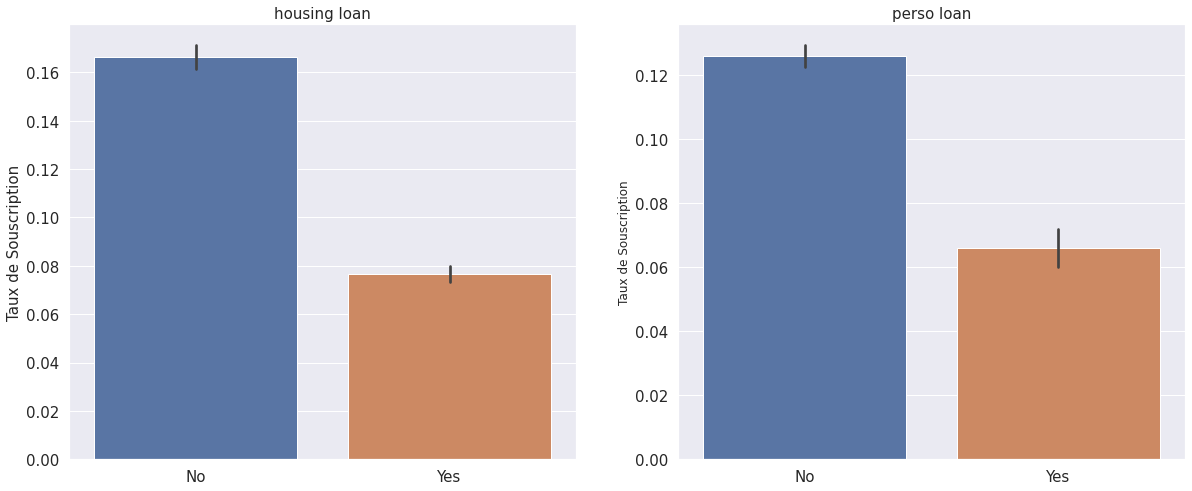

In [103]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20,8))

sns.barplot(x = 'HAS_HOUSING_LOAN', y = 'SUBSCRIPTION', data = market_campaign_merged, ax = ax1, order = ['No', 'Yes'])
ax1.set_title('housing loan', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Taux de Souscription', fontsize=15)
ax1.tick_params(labelsize=15)

sns.barplot(x = 'HAS_PERSO_LOAN', y = 'SUBSCRIPTION',data = market_campaign_merged, ax = ax2, order = ['No','Yes'])
ax2.set_title('perso loan', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Taux de Souscription')
ax2.tick_params(labelsize=15)